In [1]:
import numpy as np
import healpy as hp
import astropy.units as u
import matplotlib.pyplot as plt
import superpixel_rotations as sr


70

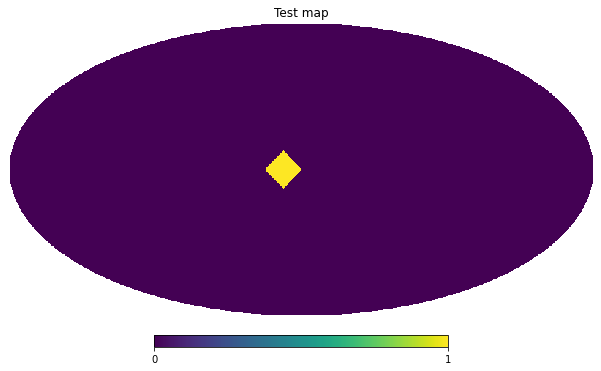

In [87]:
""" Generate test data"""
# Set nside
higher_nside = 8
lower_nside = higher_nside/2
# Calculate number of pixels in superpixel side
side = higher_nside/lower_nside
# Test data
npix = hp.nside2npix(higher_nside)
data = np.zeros(npix)
# Get and change data of a superpixel near center
center_pix = hp.vec2pix(int(lower_nside),1,0,0, nest = True)
data[int((center_pix)*side**2):int((center_pix+1)*side**2)] = 1
hp.mollview(data,nest = True, title='Test map')

In [88]:
# Get positions for shifts
pos = sr.get_unique_positions(lower_nside,higher_nside)


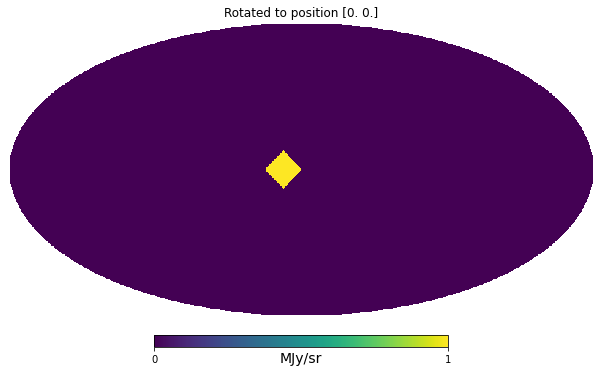

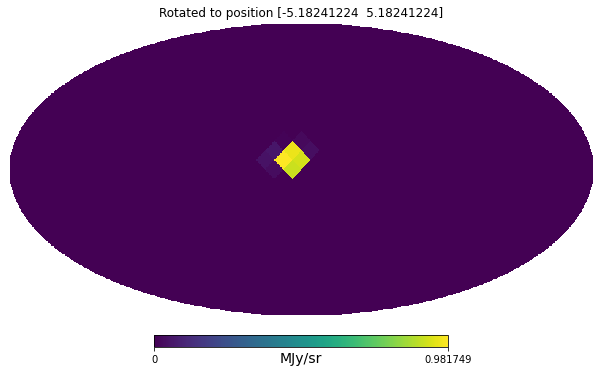

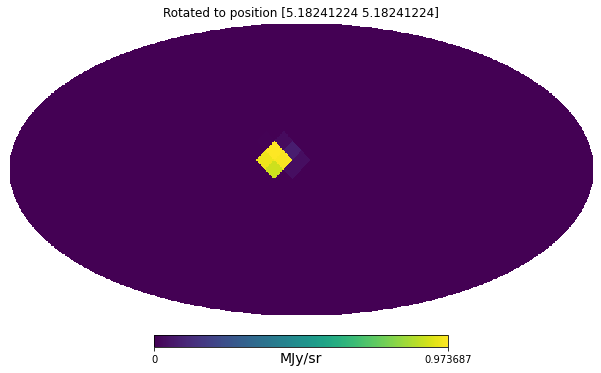

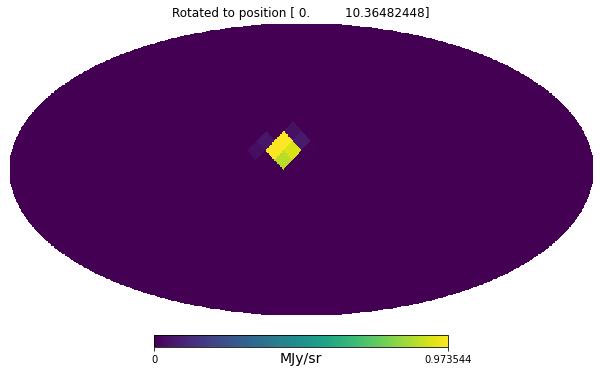

In [89]:
# Generate maps
sr.generate_maps(data,pos)